## **``Assignment-1 : EDA : Haberman's Dataset``**

In [1]:
import os
import sys
import logging

logging.basicConfig(filename="A1_Haberman.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    import scipy.stats as sc_sts
except ImportError as ie:
    # Output expected ImportErrors
    logging.error(msg=ie.__class__.__name__  + " :: Missing Package --> " + ie.name)
except Exception as exception:
    # Output unexpected Exceptions
    logging.info("#### Exceptions other than ModuleImportError ####")
    logging.log(msg=(exception, False))
    logging.log(msg=exception.__class__.__name__ + " :: " + exception.name)

%matplotlib inline

In [2]:
## Global Variables
txt_dict = {'family':'Calibri','size':18,'style':'oblique','color':'k'}
title_dict = {'family':'Calibri','size':21,'style':'oblique','color':'magenta'}
wedg_dict = {'linewidth': 1, 'edgecolor': 'black'}

In [3]:
cancer_df = pd.read_csv(os.getcwd()+'\\Datasets\\haberman.csv',names=['Age','Op_Year','Pos_Nodes','Surv_Label'],skiprows=1)
cancer_df.head()

,Age,Op_Year,Pos_Nodes,Surv_Label
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
cancer_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         306 non-null    int64
 1   Op_Year     306 non-null    int64
 2   Pos_Nodes   306 non-null    int64
 3   Surv_Label  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### **Here, we don't have any problem with the features datatypes.**

## **``Plot-1``**

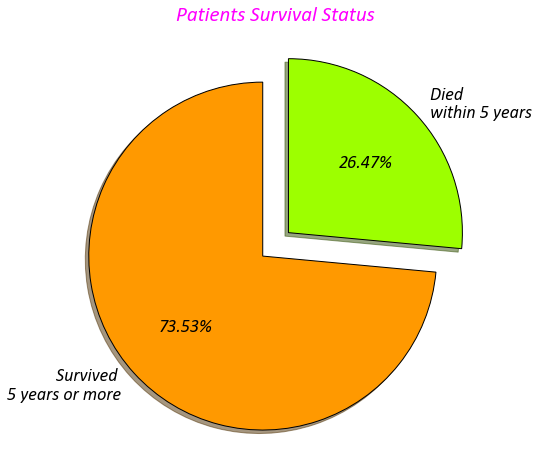

In [5]:
ptnts_srv = pd.DataFrame(cancer_df[['Surv_Label']].value_counts()).reset_index().rename(columns={0:'Patient_count'})

with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10,8))
    plt.pie(x=ptnts_srv['Patient_count'],
            autopct=lambda pct : "{:.2f}%".format(pct),
            colors=sns.color_palette('gist_rainbow'),
            shadow=True,
            labels=['Survived \n5 years or more','Died \nwithin 5 years'],
            explode=[0.1,0.1],
            startangle = 90, 
            wedgeprops = wedg_dict, 
            textprops = txt_dict)
    plt.title('Patients Survival Status',fontdict=title_dict,loc='center')

### **Here, we found out that majority of the patients in the dataset have survived for 5 or more years post treatment.**

## **``Plot-2``**

In [6]:
age_wise_pat_cnts = cancer_df.groupby(['Age'])['Op_Year'].count().reset_index().rename(columns={'Op_Year':'Age_wise_pat_cnt'})
age_wise_pat_cnts.head()

,Age,Age_wise_pat_cnt
0,30,3
1,31,2
2,33,2
3,34,7
4,35,2


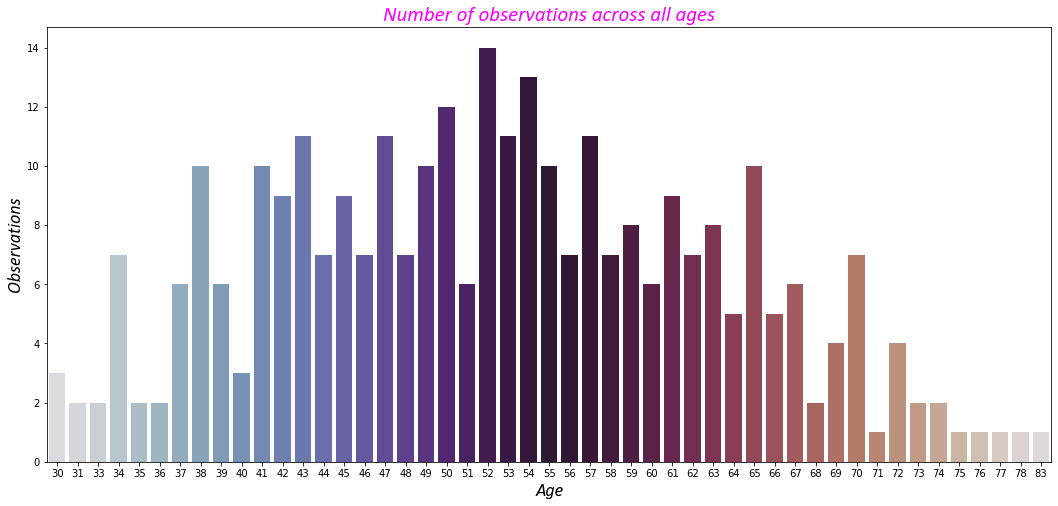

In [7]:
with plt.style.context('seaborn-bright'):
    fig,ax = plt.subplots(nrows=1,figsize=(18,8))
    sns.barplot(x='Age',y='Age_wise_pat_cnt',data=age_wise_pat_cnts,ax=ax,palette='twilight')
    ax.set_ylabel('Observations',fontdict=txt_dict)
    ax.set_xlabel('Age',fontdict=txt_dict)
    ax.set_title('Number of observations across all ages',fontdict=title_dict)

### **Here, we can say that highest number of observations are in age group of 52-57, however, we can see significant numbers throughout from 40 to 65 years of age.**

In [8]:
pd.set_option('display.max_rows',100)

In [9]:
ptnts_srv

,Surv_Label,Patient_count
0,1,225
1,2,81


## **``Plot-3``**

In [10]:
pat_cnt_surv_age_wse = cancer_df.groupby(['Surv_Label','Age'])['Op_Year'].count().reset_index().rename(columns={'Op_Year':'Pat_count'})
pat_cnt_surv_age_wse.head()

,Surv_Label,Age,Pat_count
0,1,30,3
1,1,31,2
2,1,33,2
3,1,34,5
4,1,35,2


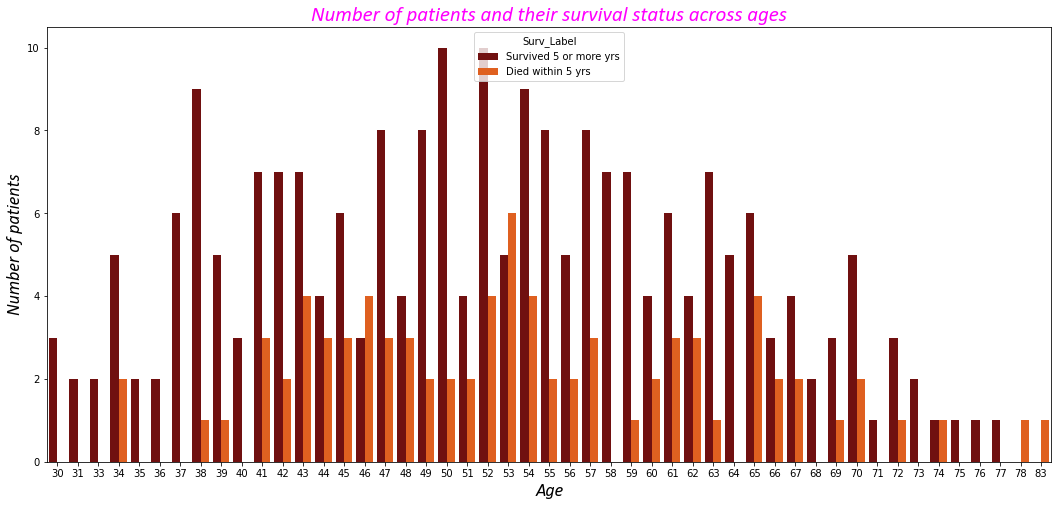

In [11]:
with plt.style.context('seaborn-bright'):
    fig,ax = plt.subplots(nrows=1,figsize=(18,8))
    sns.barplot(x='Age',y='Pat_count',hue='Surv_Label',data=pat_cnt_surv_age_wse,ax=ax,palette='gist_heat')
    ax.set_ylabel('Number of patients',fontdict=txt_dict)
    ax.set_xlabel('Age',fontdict=txt_dict)
    ax.set_title('Number of patients and their survival status across ages',fontdict=title_dict)
    
    leg = ax.get_legend()
    new_labels = ['Survived 5 or more yrs','Died within 5 yrs']
    for title, label in zip(leg.texts, new_labels): title.set_text(label)
    plt.show()

### **Here, we found out that very less number of patients have expired within 5 years of treatment till 40 years of age. The highest number of deaths within the 5 years have been observed for the age 53 where survival of 5 or more years is almost equivalent. Overall, it states that more number of patients have survived for 5 or more years across every age.**

## **``Plot-4``**

In [12]:
def age_groups(val):
    """
    Description: This function is created for bucketing the age into various groups.
    
    Input: It accepts only one parameter:
        1. val : Age value
    
    Return: Age group
    """
    if val >= 30 and val <=40:
        return 'Group1'
    if val >= 41 and val <=50:
        return 'Group2'
    if val >= 51 and val <=60:
        return 'Group3'
    if val >= 61 and val <=70:
        return 'Group4'
    if val >= 71:
        return 'Group5'

In [13]:
cancer_df['Age_Group'] = cancer_df['Age'].apply(lambda val: age_groups(val))
cancer_df.head(7)

,Age,Op_Year,Pos_Nodes,Surv_Label,Age_Group
0,30,64,1,1,Group1
1,30,62,3,1,Group1
2,30,65,0,1,Group1
3,31,59,2,1,Group1
4,31,65,4,1,Group1
5,33,58,10,1,Group1
6,33,60,0,1,Group1


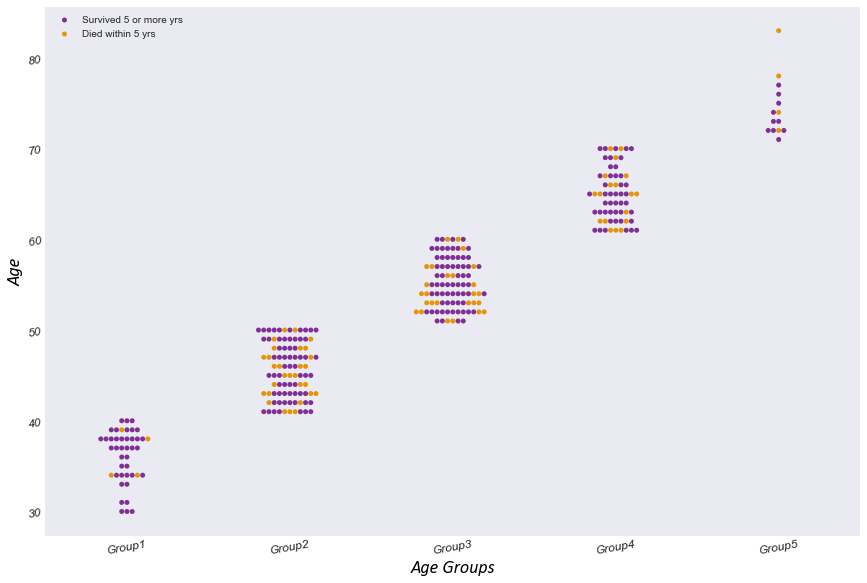

In [14]:
with plt.style.context('seaborn-dark'):
    sns.catplot(x='Age_Group',y='Age',hue='Surv_Label',kind='swarm',data=cancer_df,palette='CMRmap',aspect=1.5,height=8,legend_out=False)
    plt.xlabel('Age Groups',fontdict=txt_dict)
    plt.ylabel('Age',fontdict=txt_dict)
    plt.xticks(style='oblique',size=12,rotation=10)
    plt.yticks(style='oblique',size=12,rotation=10)
    new_labels = ['Survived 5 or more yrs','Died within 5 yrs']
    plt.legend(labels=new_labels)
    plt.show()

### **Here, we can see that more number of observations are in Group2 and Group3. As observed in the above plots, Group-1 has witnessed the least number of patients who died within 3 years of treatment.**

### **In Group-4, we can say that the overall number of observations are quite less but the patients who died within 5 years of treatment are a bit similar to Group2 and Group3.**

## **``Plot-5``**

In [15]:
agg_data_surv1 = cancer_df[cancer_df['Surv_Label'] == 1].groupby(['Surv_Label','Age'])['Pos_Nodes'].agg(['mean','max']).round(2)
agg_data_surv1.head(10)

mean  max
Surv_Label Age           
1          30   1.33    3
           31   3.00    4
           33   5.00   10
           34   9.60   30
           35   6.50   13
           36   0.50    1
           37   3.50   15
           38   2.56   11
           39   1.20    4
           40   0.67    2

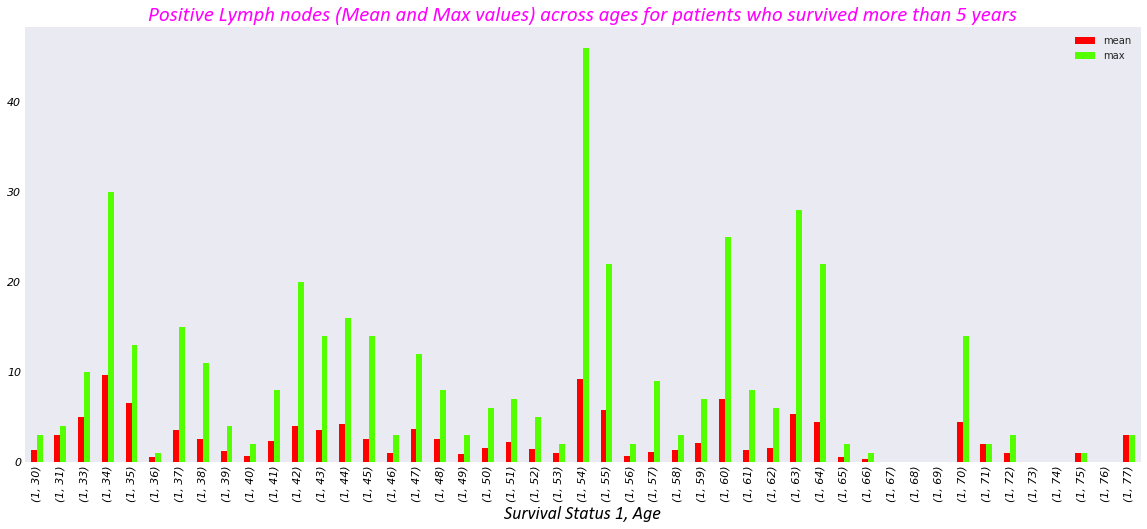

In [16]:
with plt.style.context('seaborn-dark'):
    agg_data_surv1.plot(kind='bar',colormap='prism',figsize=(20,8))
    plt.xlabel('Survival Status 1, Age',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Positive Lymph nodes (Mean and Max values) across ages for patients who survived more than 5 years',fontdict=title_dict)
    plt.legend()

### **Here, it is very much evident that the difference between the Maximum and most frequent positive nodes is very high among patients who survived for 5 or more years.**

## **``Plot-6``**

In [17]:
agg_data_surv2 = cancer_df[cancer_df['Surv_Label'] == 2].groupby(['Surv_Label','Age'])['Pos_Nodes'].agg(['mean','max']).round(2)
agg_data_surv2.head(10)

mean  max
Surv_Label Age            
2          34    4.50    9
           38   21.00   21
           39    0.00    0
           41    7.67   23
           42    0.50    1
           43   13.50   52
           44   11.33   19
           45    2.33    6
           46    7.50   20
           47    7.67   23

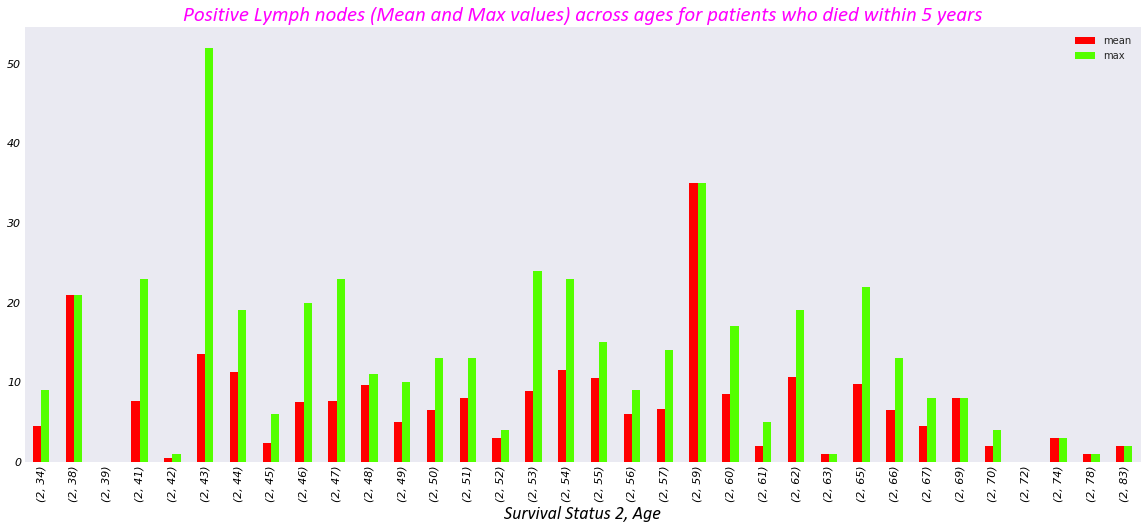

In [18]:
with plt.style.context('seaborn-dark'):
    agg_data_surv2.plot(kind='bar',colormap='prism',figsize=(20,8))
    plt.xlabel('Survival Status 2, Age',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Positive Lymph nodes (Mean and Max values) across ages for patients who died within 5 years',fontdict=title_dict)
    plt.legend()

### **Here, for patients who died within 5 years of treatment the difference between the Maximum and most frequent positive nodes is significantly less as compared to the other class.**

## **``Plot-7``**

In [19]:
age_grp_agg = cancer_df.groupby(['Surv_Label','Age_Group'])['Pos_Nodes'].agg(['mean','max'])
age_grp_agg

mean  max
Surv_Label Age_Group               
1          Group1     3.435897   30
           Group2     2.578125   20
           Group3     3.298507   46
           Group4     2.200000   28
           Group5     0.900000    3
2          Group1     7.500000   21
           Group2     7.724138   52
           Group3     8.923077   35
           Group4     6.222222   22
           Group5     1.500000    3

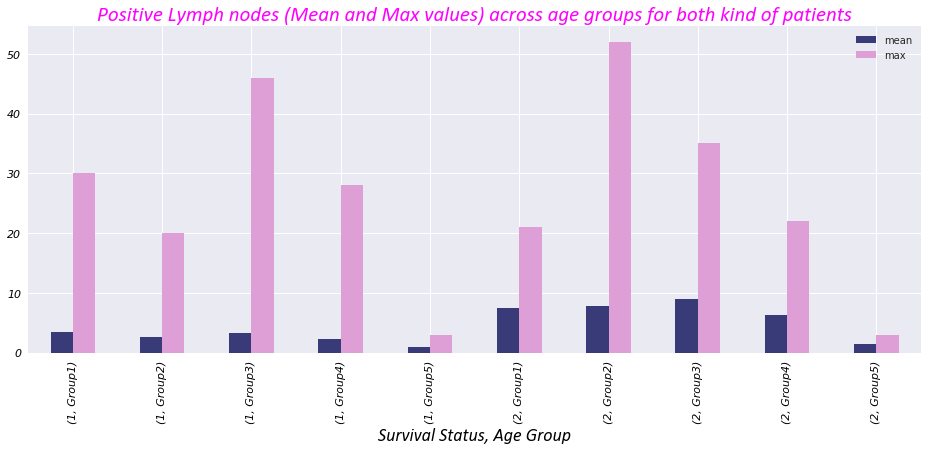

In [20]:
with plt.style.context('seaborn'):
    age_grp_agg.plot(kind='bar',colormap='tab20b',figsize=(16,6))
    plt.xlabel('Survival Status, Age Group',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Positive Lymph nodes (Mean and Max values) across age groups for both kind of patients',fontdict=title_dict)
    plt.legend()

### **So, across every age group we have witnessed approximately 50% rise in the average number of positive lymph nodes. And, Group2 has a paramount rise in the maximum number of lymph nodes identified.**

## **``Plot-8``**

In [21]:
cancer_df['Op_Year_Nw'] = cancer_df['Op_Year'].apply(lambda val : int('19'+str(val)))
cancer_df.head()

,Age,Op_Year,Pos_Nodes,Surv_Label,Age_Group,Op_Year_Nw
0,30,64,1,1,Group1,1964
1,30,62,3,1,Group1,1962
2,30,65,0,1,Group1,1965
3,31,59,2,1,Group1,1959
4,31,65,4,1,Group1,1965


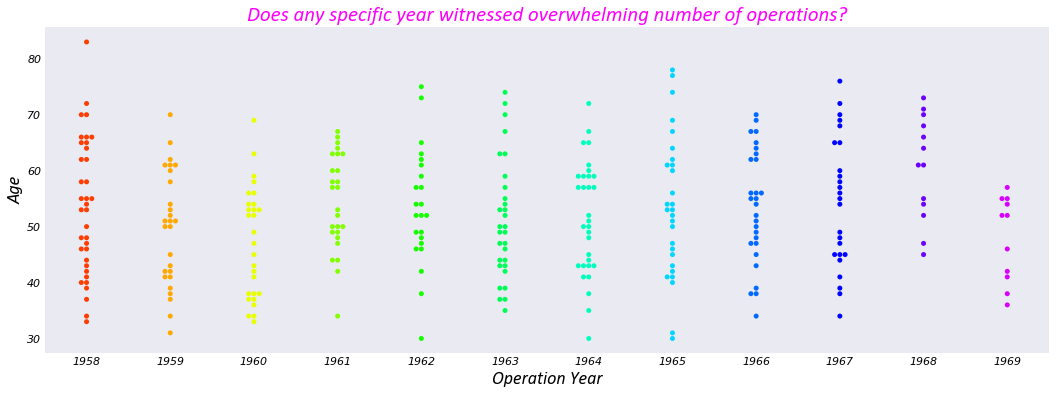

In [22]:
with plt.style.context('seaborn-dark'):
    plt.figure(figsize=(18,6))
    sns.swarmplot(x='Op_Year_Nw',y='Age',palette='gist_rainbow',data=cancer_df)
    plt.xlabel('Operation Year',fontdict=txt_dict)
    plt.ylabel('Age',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does any specific year witnessed overwhelming number of operations?',fontdict=title_dict)
    plt.legend()

### **So, it looks like the data has been collected for approximately same number of operations happened across these years. The last two years (1968 and 1969) represents a bit less number of operations. This can be due to many reasons (either data not shared or less # of operations or not all the patients opted for treatment or less # of patients).**

## **``Plot-9``**

In [23]:
cancer_df.head()

,Age,Op_Year,Pos_Nodes,Surv_Label,Age_Group,Op_Year_Nw
0,30,64,1,1,Group1,1964
1,30,62,3,1,Group1,1962
2,30,65,0,1,Group1,1965
3,31,59,2,1,Group1,1959
4,31,65,4,1,Group1,1965


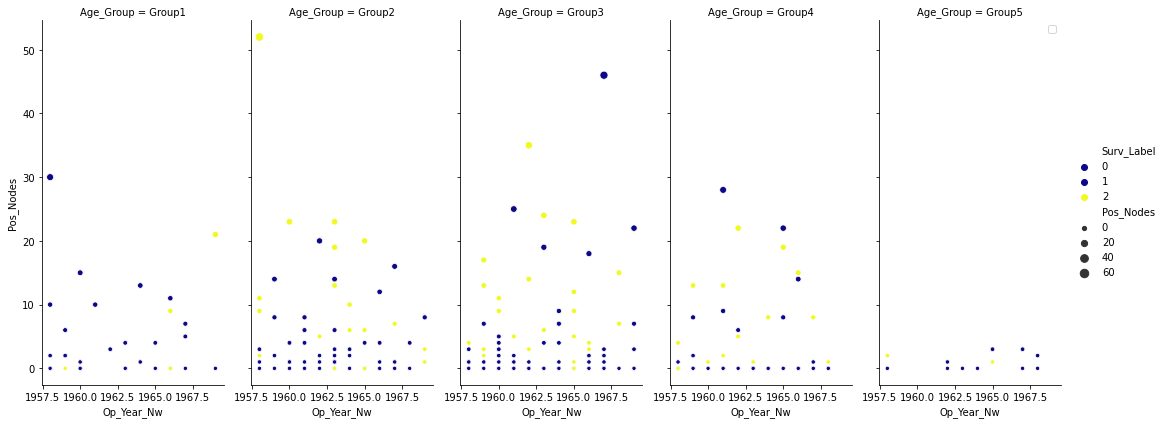

In [25]:
with plt.style.context('seaborn-bright'):
    sns.relplot(x='Op_Year_Nw',y='Pos_Nodes',size='Pos_Nodes',hue='Surv_Label',col='Age_Group',
                data=cancer_df,height=6,aspect=0.5,kind='scatter',palette='plasma')
    plt.legend()

### **For the two major groups 2 & 3 its quite evident that both type of patients are spread across every year which is good. And, it looks like they have some good proportion of both kind of patients.**

## **``Plot-10``**

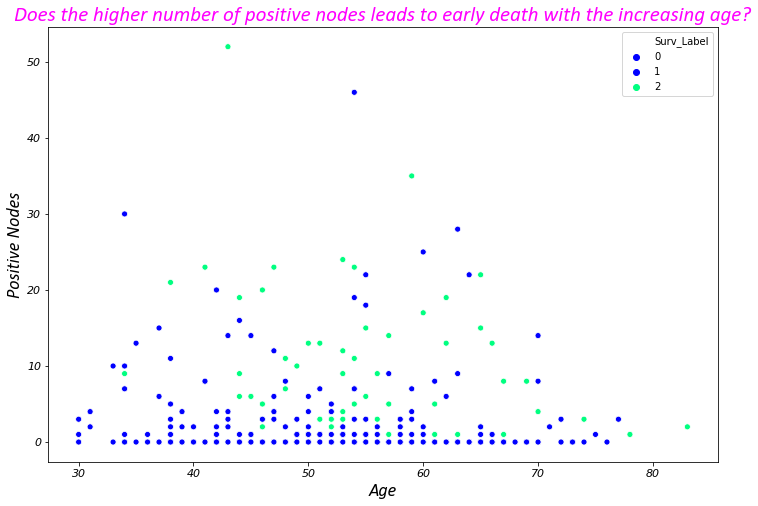

In [38]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='Age',y='Pos_Nodes',hue='Surv_Label',data=cancer_df,palette='winter')
    plt.xlabel('Age',fontdict=txt_dict)
    plt.ylabel('Positive Nodes',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does the higher number of positive nodes leads to early death with the increasing age?',fontdict=title_dict)
    plt.legend()

#### **Here, we cannot say that we have got the substantial evidence to claim that higher number of positive lymph nodes with the increasing age leads to early death, however, if we give a closer look towards the age bracket 48 to 68 then we surely get some hint towards this theory. As, for this age bracket majortiy of the patients with positive nodes 10 or more have been died within 5 years of treatment.** 

## **``Plot-11``**

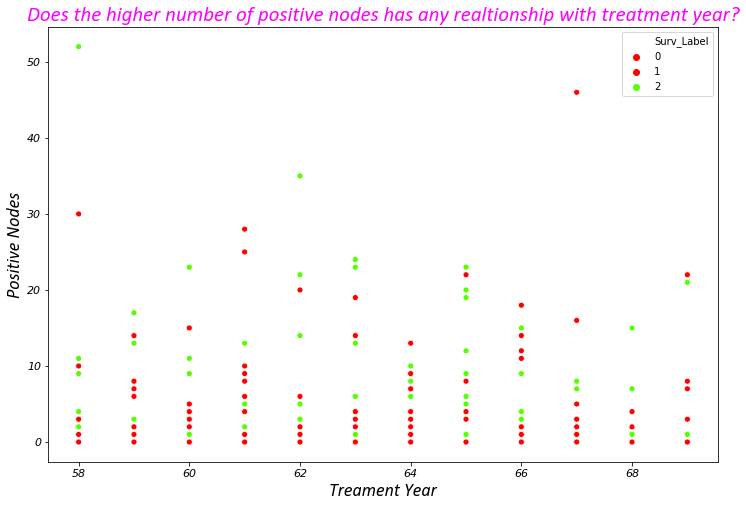

In [210]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='Op_Year',y='Pos_Nodes',hue='Surv_Label',data=cancer_df,palette='prism')
    plt.xlabel('Treament Year',fontdict=txt_dict)
    plt.ylabel('Positive Nodes',fontdict=txt_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does the higher number of positive nodes has any realtionship with treatment year?',fontdict=title_dict)
    plt.legend()

### **Really can't see a way in above scatter plot to linearly separate the classes of patients.**

In [213]:
np.corrcoef(x=cancer_df['Op_Year'],y=cancer_df['Pos_Nodes'])

array([[ 1.        , -0.00376447],
       [-0.00376447,  1.        ]])

In [214]:
np.corrcoef(x=cancer_df['Op_Year'],y=cancer_df['Pos_Nodes'])**2

array([[1.00000000e+00, 1.41712658e-05],
       [1.41712658e-05, 1.00000000e+00]])

### **So, the variation in these two features is non-explainable among them.**

## **``Plot-12``**

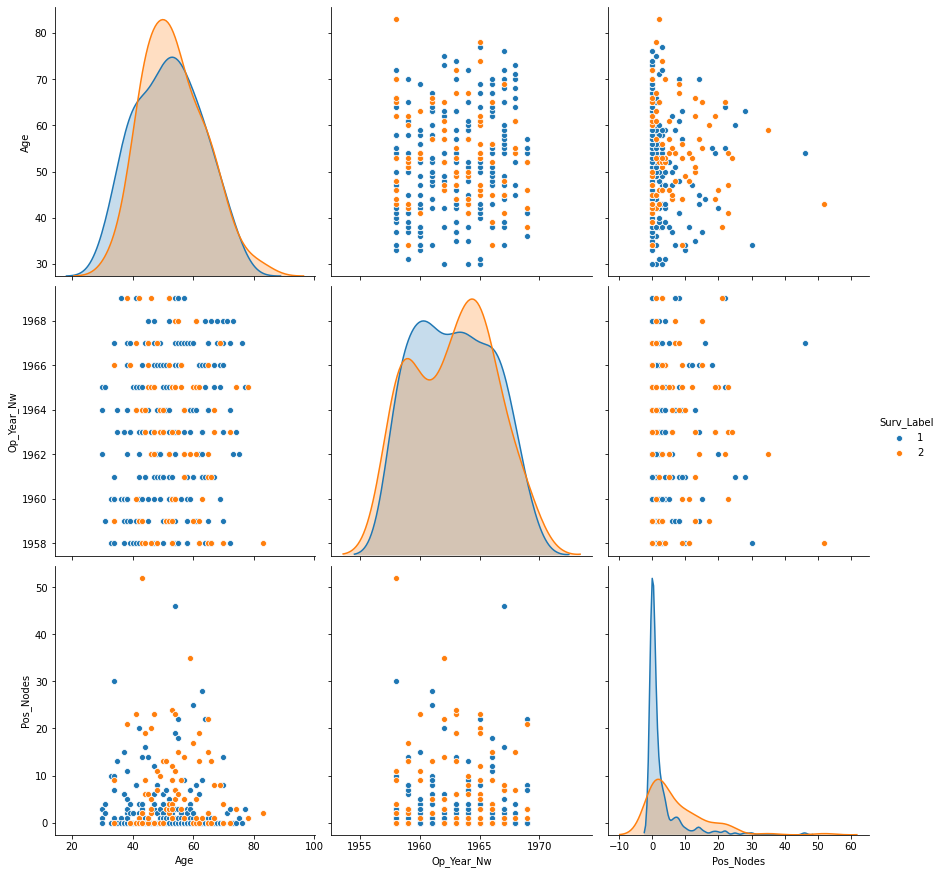

In [141]:
sns.pairplot(data=cancer_df[['Age','Op_Year_Nw','Pos_Nodes','Surv_Label']],hue='Surv_Label',height=4,aspect=1);

#### **Clearly, classes are not linearly separable and majority of the data points are overlapping. As identified in one of the above plots, there is one window which slightly suggests us that in age bracket 48-68 with 10 or more positive nodes the chances of early death are quite high.**

#### **Below, I'll try to calculate the birth year of the patient and will see how it behaves with other features.(I'm sure that this will not provide me any significant results because its value will be highly dependent on the patient age so they can end with high correlation).**

## **``Plot-13``**

In [142]:
def birth_year(age,op_year,label):
    """
    Description: This function has been created for generating the birth year of the patient.
    
    Input arguments: It accepts 3 parameters:
        1. age: patient age
        2. op_year: operation year
        3. label: survival label
        
    Return: Int
        Patient Birth year
        
    """
    np.random.seed(22)
    if label == 1:
        diff_val = np.random.randint(low=5,high=11,size=1)[0]
    else:
        diff_val = np.random.randint(low=1,high=5,size=1)[0]
    
    return (op_year + diff_val) - (age)

In [126]:
cancer_df['birth_year'] = cancer_df[['Age','Op_Year_Nw','Surv_Label']].apply(lambda row: birth_year(row['Age'],
                                                                                                    row['Op_Year_Nw'],
                                                                                                    row['Surv_Label']),axis=1)

In [127]:
cancer_df.head()

,Age,Op_Year,Pos_Nodes,Surv_Label,Age_Group,Op_Year_Nw,birth_year
0,30,64,1,1,Group1,1964,1944
1,30,62,3,1,Group1,1962,1942
2,30,65,0,1,Group1,1965,1945
3,31,59,2,1,Group1,1959,1938
4,31,65,4,1,Group1,1965,1944


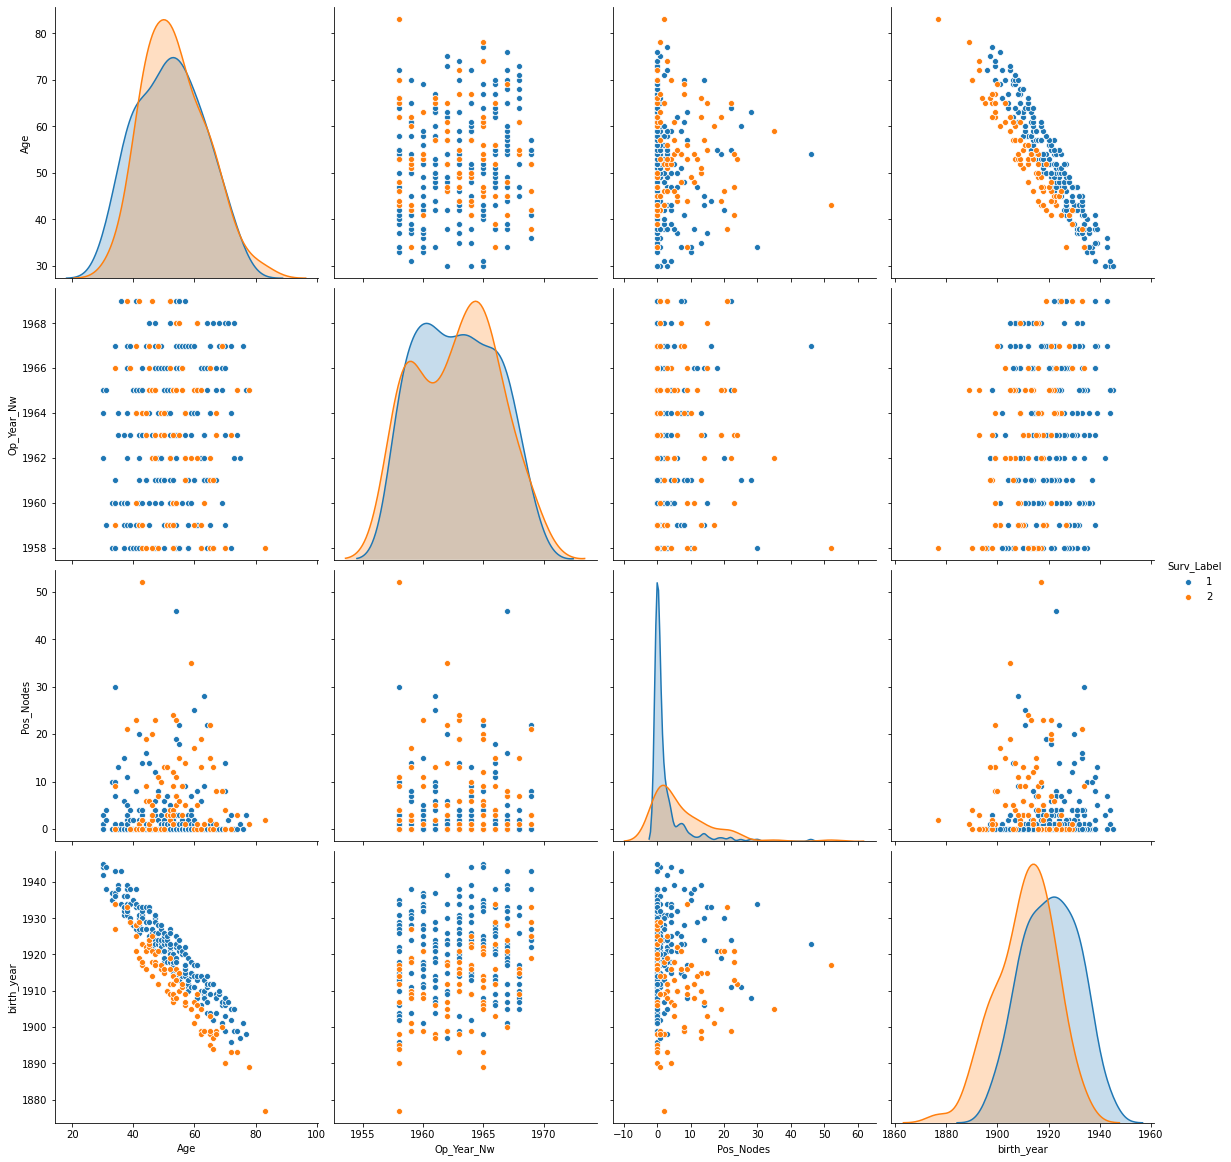

In [143]:
sns.pairplot(data=cancer_df[['Age','Op_Year_Nw','Pos_Nodes','birth_year','Surv_Label']],hue='Surv_Label',height=4,aspect=1);

### **Quite similar results here as well. As doubted above, Age and Birth Year looks like highly negative correlated.**

In [144]:
np.corrcoef(x=cancer_df['Age'],y=cancer_df['birth_year'])

array([[ 1.        , -0.91274312],
       [-0.91274312,  1.        ]])

In [131]:
np.corrcoef(x=cancer_df['Age'],y=cancer_df['birth_year'])**2

array([[1.    , 0.8331],
       [0.8331, 1.    ]])

### **So, approx 83% of variation in these two features is explainable among them. This is very high, so nothing fruitful here.**

## **``Plot-14``**

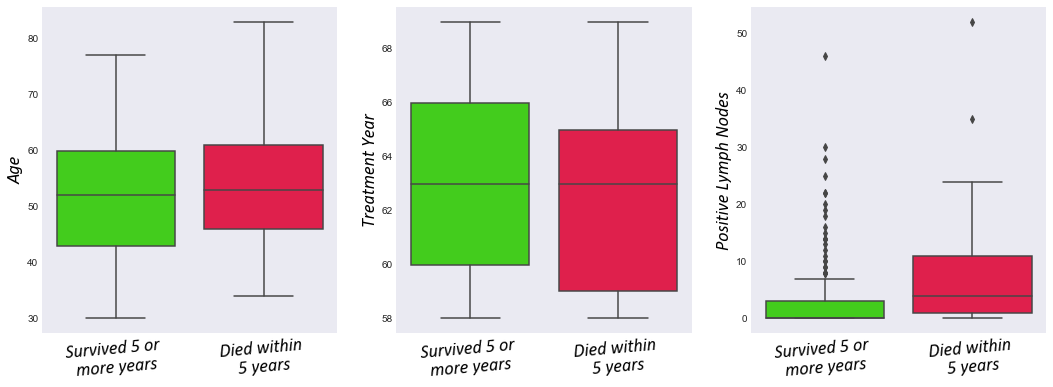

In [203]:
feat_dict = {'Age':'Age','Op_Year':'Treatment Year','Pos_Nodes':'Positive Lymph Nodes'}
xlabels = ['Survived 5 or \nmore years', 'Died within \n5 years']

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    for idx, feature in enumerate(list(cancer_df[['Age','Op_Year','Pos_Nodes']].columns)):
        sns.boxplot(x='Surv_Label', y=feature, data=cancer_df, ax=ax[idx],palette='prism')
        ax[idx].set_xticklabels(labels=xlabels,rotation='5',fontdict=txt_dict)
        ax[idx].set_xlabel('')
        ax[idx].set_ylabel(feat_dict[feature],fontdict=txt_dict)
    plt.show()  

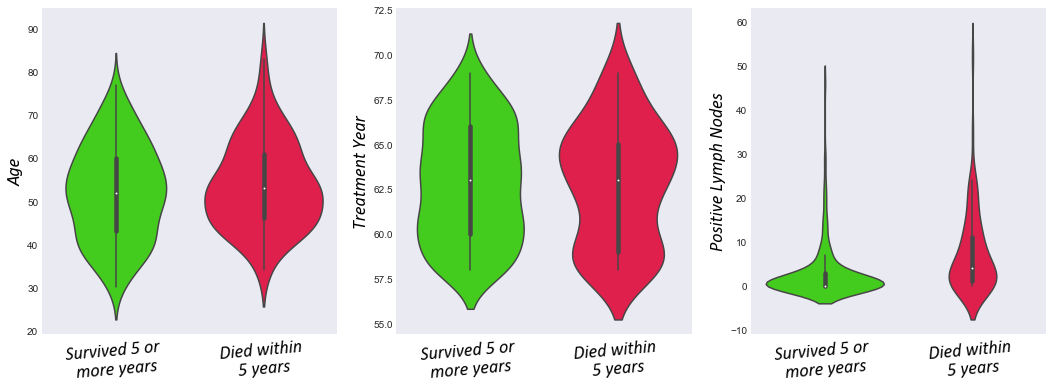

In [199]:
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    for idx, feature in enumerate(list(cancer_df[['Age','Op_Year','Pos_Nodes']].columns)):
        sns.violinplot(x='Surv_Label', y=feature, data=cancer_df, ax=ax[idx],palette='prism')
        ax[idx].set_xticklabels(labels=xlabels,rotation='5',fontdict=txt_dict)
        ax[idx].set_xlabel('')
        ax[idx].set_ylabel(feat_dict[feature],fontdict=txt_dict)
    plt.show()  

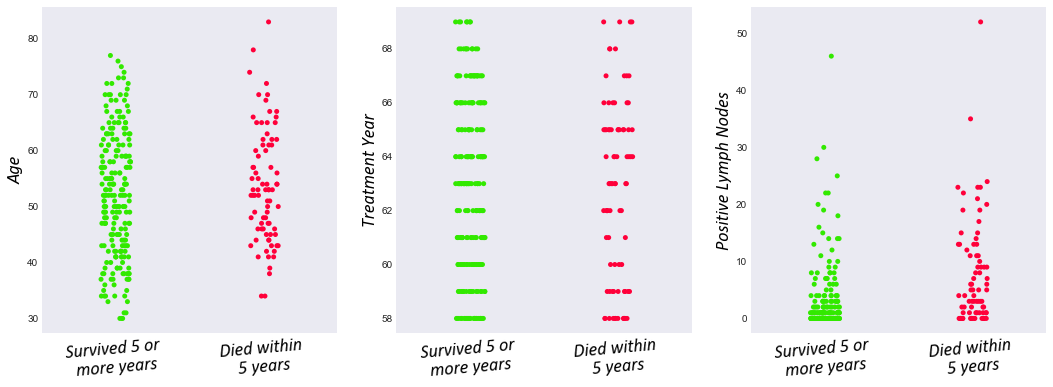

In [206]:
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    for idx, feature in enumerate(list(cancer_df[['Age','Op_Year','Pos_Nodes']].columns)):
        sns.stripplot(x='Surv_Label', y=feature, data=cancer_df, ax=ax[idx],palette='prism')
        ax[idx].set_xticklabels(labels=xlabels,rotation='5',fontdict=txt_dict)
        ax[idx].set_xlabel('')
        ax[idx].set_ylabel(feat_dict[feature],fontdict=txt_dict)
    plt.show()

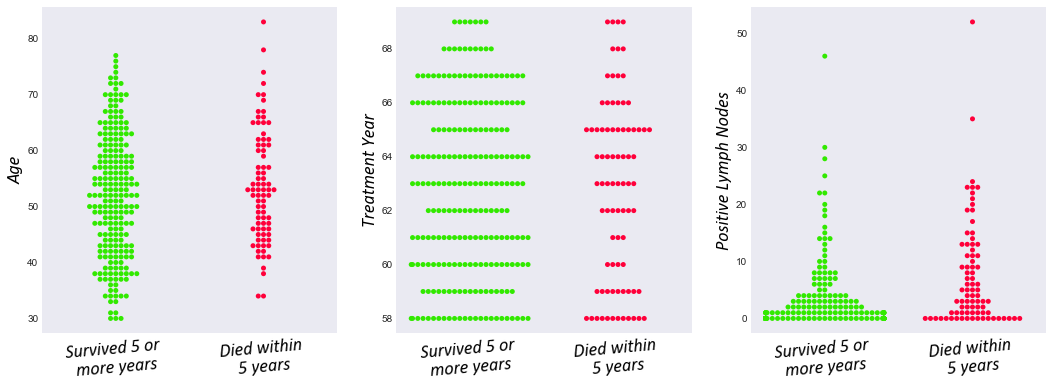

In [207]:
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    for idx, feature in enumerate(list(cancer_df[['Age','Op_Year','Pos_Nodes']].columns)):
        sns.swarmplot(x='Surv_Label', y=feature, data=cancer_df, ax=ax[idx],palette='prism')
        ax[idx].set_xticklabels(labels=xlabels,rotation='5',fontdict=txt_dict)
        ax[idx].set_xlabel('')
        ax[idx].set_ylabel(feat_dict[feature],fontdict=txt_dict)
    plt.show()  

### **The above 4 plots provides similar kind of information and they are different from each other in a very slight manner.**

## **``Conclusion``**

#### **By seeing all the patterns, it is quite evident that the features of this dataset are not linearly separable and the survival status has been influenced by one or more confounding variables. However, with the increase in ``AGE``,  we have witnessed the rise in occurrence of positive ``Lymph Nodes`` and after its certain value, the results weighted slightly heavy towards the minority class('death within 5 years').**